
The Sparks Foundation Data Science & Business Analytics Task-6: Prediction using Decision Tree Algorithm



# importing libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn .model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn . metrics import accuracy_score,classification_report,confusion_matrix
from sklearn . preprocessing import LabelEncoder


In [2]:
df= pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.drop(['Id'], inplace=True, axis=1)

In [9]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.duplicated().sum()

3

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

C:\myanaconda\envs\Epsilon_noor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm', ylabel='count'>

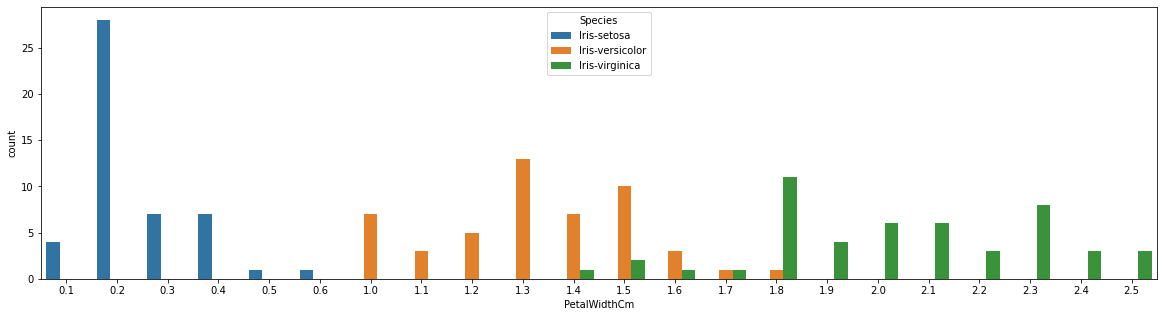

In [38]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalWidthCm"], hue=df["Species"])

C:\myanaconda\envs\Epsilon_noor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm', ylabel='count'>

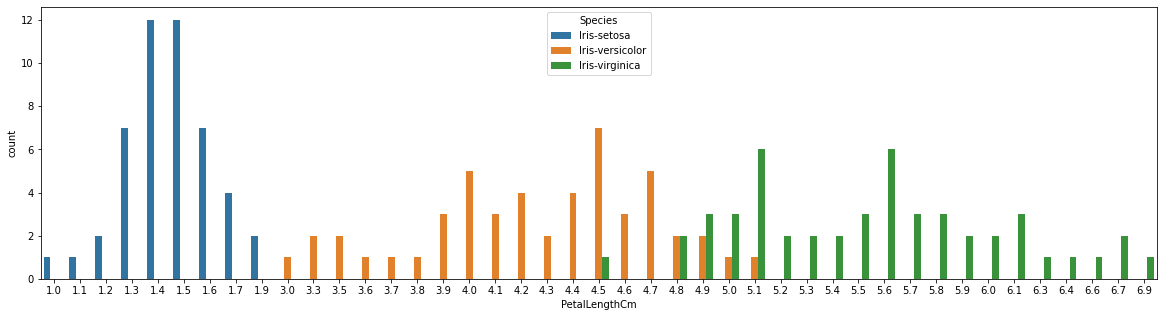

In [39]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalLengthCm"], hue=df["Species"])

C:\myanaconda\envs\Epsilon_noor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm', ylabel='count'>

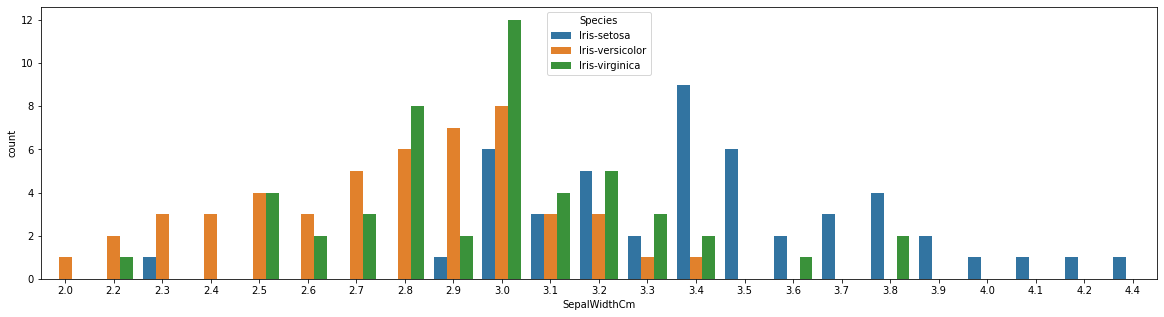

In [40]:
plt.figure(figsize=(20,5))
sns.countplot(df["SepalWidthCm"], hue=df["Species"])

# preprocessing

In [16]:
x=df.drop('Species', axis=1)
y=df['Species']

In [19]:
encoder = LabelEncoder()
y=encoder.fit_transform(y)

In [21]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=0.15, stratify=y,random_state=7)

# search the best pramter

In [22]:
params = {
    'max_depth': [2, 4, 6, 8, 10,12,14,16,18,20],
    'min_samples_leaf': [5, 10, 20, 40, 60, 80, 100],
    'min_samples_split': [5, 10, 20, 40, 60, 80, 100]
}

In [23]:
classifier = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=classifier,param_grid=params, cv=3, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train, y_train)
grid_search.best_estimator_

Fitting 3 folds for each of 490 candidates, totalling 1470 fits


DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

# Train the  model 

In [25]:
model=grid_search.best_estimator_
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=5, min_samples_split=5)

# Evaluate the model

In [27]:
y_train_pre= model.predict(x_train)
y_test_pre= model.predict(x_test)

In [28]:
print('train accuracy is ', accuracy_score(y_train , y_train_pre))
print('test accuracy is ', accuracy_score(y_test , y_test_pre))


train accuracy is  0.9596774193548387
test accuracy is  0.9565217391304348


In [29]:
print("classification stats for Decision Tree :\n\n",classification_report(y_test , y_test_pre))

classification stats for Decision Tree :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94         8
           2       1.00      0.88      0.93         8

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



# confusion matrix

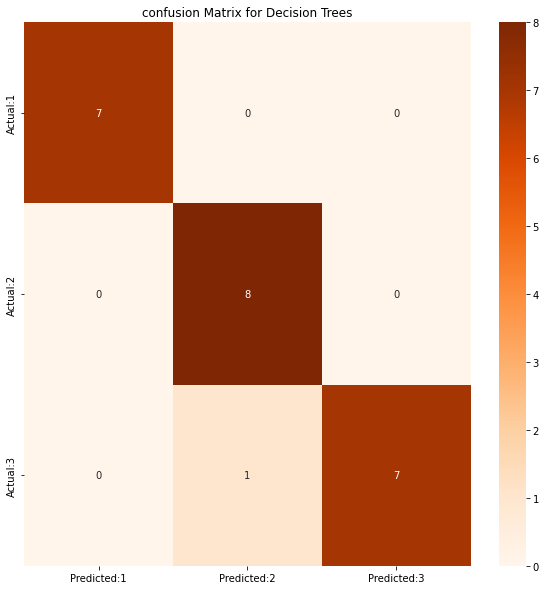

In [33]:
cm=confusion_matrix(y_test,y_test_pre)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:1','Predicted:2','Predicted:3'],
                                         index=['Actual:1','Actual:2','Actual:3'])                          
plt.figure(figsize = (10,10))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap='Oranges')
plt.title("confusion Matrix for Decision Trees")
plt.show()

# visualization of tree

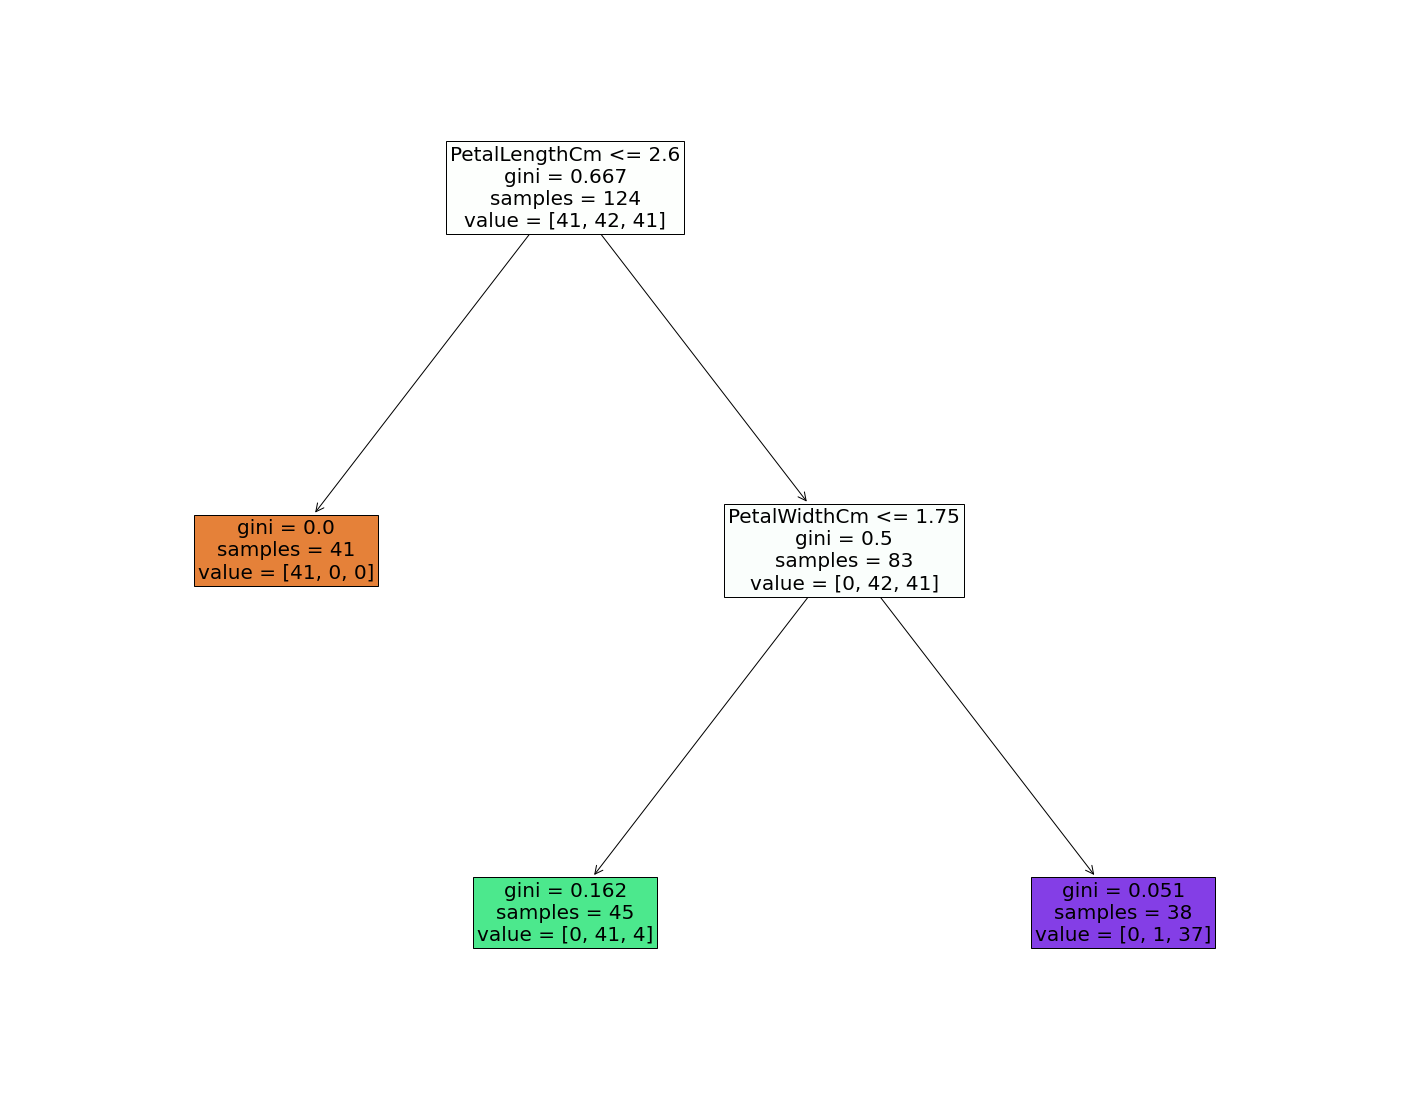

In [37]:
fig = plt.figure(figsize=(25,20))
graph = tree.plot_tree(model,feature_names=df.columns,filled=True,fontsize=20)
